# Multivariate Calculus

In this section of Math for ML I'll carry on with the topic of calculus by discussing the calculus of multivariate functions. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Multivariate Differentiation

Just as we can differentiate *univariate* functions like $y=f(x)$, we can also differentiate *multivariate* functions like $z=f(x,y)$. The main difference is that we can take derivatives of many inputs variables, not just one.

### The Gradient

Suppose $z=f(x,y)$ and we want to ask the question, how does $z$ change if we change $x$ by an infinitesimal amount $dx$, holding $y$ constant? Evidently it would be $z + dz = f(x+dx, y)$. If we pretend $y$ is constant, this would mean

$$dz = f(x+dx, y) - f(x, y).$$

Dividing both sides by $dx$ we'd get *something* like a derivative. But it's not *the* derivative since we're only changing $x$ and fixing $y$. For this reason it's called the **partial derivative** of $z$ with respect to $x$, and typically written with funny $\partial$ symbols instead of $d$ symbols,

$$\frac{\partial z}{\partial x} = \frac{f(x+dx, y) - f(x, y)}{dx}.$$

Similarly, we can ask the dual question, how does $z$ change if we change $y$ by an infinitesimal amount $dy$, holding $x$ constant? By the same logic, we'd get

$$dz = f(x, y + dy) - f(x, y),$$

and dividing by $dy$ would give the partial derivative of $z$ with respect to $y$,

$$\frac{\partial z}{\partial y} = \frac{f(x, y + dy) - f(x, y)}{dy}.$$

But these don't tell us everything. We want to know how $z$ changes if we change $x$ and $y$ arbitrarily, not if we hold one of them constant. That is, we want the full $dz$. In the case when $y=f(x)$, we saw that $dy=\frac{dy}{dx}dx$. If we only change $x$, evidently $dz = \frac{\partial z}{\partial x} dx$. Similarly if we only change $y$, then $dz = \frac{\partial z}{\partial y} dy$. It seems like if we want to change *both*, we should add these two effects together,

$$dz = \frac{\partial z}{\partial x} dx + \frac{\partial z}{\partial y} dy.$$

This equation is called the bivariate **chain rule**. Since it depends on changes in both $x$ and $y$, $dz$ is called the **total differential**. The chain rule tells us everything we need to know about how $z$ changes when either $x$ or $y$ are perturbed by some small amount. The amount that $z$ gets perturbed is $dz$.

If we have a composite function like, say, $z=f(x,y)$, $x=g(u, v)$, $y=h(u, v)$, we can do just like in the univariate chain rule and divide the total differential by $du$ or $dv$ to get the chain rule in partial derivative form,

$$\frac{\partial z}{\partial u} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial u} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial u},$$

$$\frac{\partial z}{\partial v} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial v} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial v}.$$

This is the form in which the bivariate chain rule usually appears in deep learning, but with many more variables.

It's interesting to write this formula as a dot product of two vectors. If we define two vectors as follows,

$$\frac{dz}{d\mathbf{x}}=\big(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\big),$$

$$d\mathbf{x} = (dx, dy),$$

then the chain rule would say

$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.$$

This looks just like the equation for the ordinary derivative, $dy=\frac{dy}{dx}dx$,except there's a dot product of vectors here.

The vector $\frac{dz}{d\mathbf{x}}$ looks like the ordinary derivative, but it's now a vector of partial derivatives. It's called the **gradient** of $z=f(x,y)$, also often written $\nabla f(x,y)$.

Let's do an example. Consider the function $z=x^2+y^2$. This function has a surface that looks like a bowl.

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

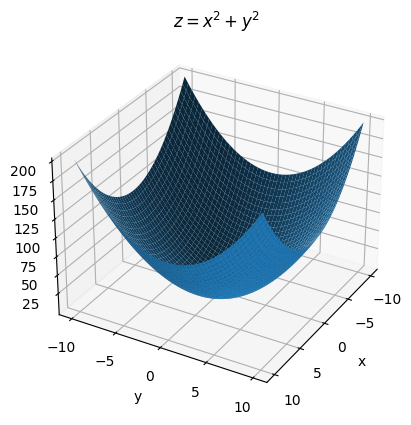

In [4]:
plot_3d(x, y, f, title='$z=x^2+y^2$')

Suppose we treat $y$ as constant, say $y=2$. If we nudge $x$ to $x+dx$, then $z$ would get nudged to

$$z+dz = f(x+dx,y) = (x+dx)^2 + y^2 = (x^2 + 2xdx + dx^2) + y^2 \approx z + 2xdx.$$

That is,
$$\frac{\partial z}{\partial x} = 2x.$$

This is exactly what we got before in the univariate case with $f(x)=x^2$. This makes since. By treating $y$ as constant we're effectively pretending it's not there in the calculation, which makes it act like we're taking the 1D derivative $z=x^2$.

Since $z=x^2+y^2$ is symmetric in $x$ and $y$, the exact same argument above would show

$$\frac{\partial z}{\partial y} = 2y.$$

The gradient vector would thus be
$$\frac{dz}{d\mathbf{x}} = (2x, 2y) = 2\mathbf{x}, \quad \text{where }\mathbf{x} = (x,y).$$

The gradient looks exactly like the 1D version where $y=x^2$ and $\frac{dy}{dx}=2x$, except there's a vector $\mathbf{x}$ instead. 

Just as with the ordinary derivative, we can see that the gradient is a function of its inputs. The difference though is the gradient is a *vector-valued function*. Its output is a vector, not a scalar. To indicate it's a vector-valued derivative, one sometimes might write $\frac{d}{d\mathbf{x}}f(\mathbf{x})$, or $\mathbf{f}'(\mathbf{x})$ where the $\mathbf{f}'$ is bolded.

Numerical differentiation extends naturally to the bivariate case as well. We can calculate partial derivatives numerically straight from their definitions, using reasonably small values like $dx=dy=10^{-5}$. To get the gradient, just calculate the partials numerically and put them into an array. 

Here's an example. I'll calculate the partials $\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}$ at the point $x_0=1, y_0=1$. The partials are given by `dzdx` and `dzdy` respectively, and the gradient vector by `grad`. Notice the error is again on the order of $dx$ and $dy$, hence we get good agreement with the above equation when $x_0=1, y_0=1$.

In [5]:
x0 = y0 = 1
dx = dy = 1e-5

dzdx = (f(x0 + dx, y0) - f(x0, y0)) / dx
dzdy = (f(x0, y0 + dy) - f(x0, y0)) / dy

grad = [dzdx, dzdy]
grad

[2.00001000001393, 2.00001000001393]

### Visualizing Gradients

In the case of the ordinary univariate derivative $\frac{dy}{dx}$, we could think of it geometrically as the slope of the tangent line to $y=f(x)$ at a point $(x_0,y_0)$. We can do something similar for the gradient $\frac{dz}{d\mathbf{x}}$ by thinking of it as the vector of slopes defining a tangent plane to $z=f(\mathbf{x})$ at a point $(\mathbf{x}_0, z_0)$.

Suppose $z=f(x,y)$. Let $(x_0,y_0,z_0) \in \mathbb{R}^3$ be a point in 3D space, with $z_0=f(x_0,y_0)$. This is just a point on the 2D surface of $z=f(x,y)$. Now, it doesn't make much sense to talk about a single *line* that hugs this point, since there can now be infinitely many lines that hug that point. What we instead want to do is think about a *plane* that hugs the surface. This will be called the **tangent plane**. It's given by the first order perturbation

$$z = z_0 + \frac{\partial}{\partial x}f(x_0,y_0) (x - x_0) + \frac{\partial}{\partial y}f(x_0,y_0) (y - y_0),$$

or in vector notation,
$$z = z_0 + \frac{d}{d\mathbf{x}} f(\mathbf{x}_0) \cdot (\mathbf{x} - \mathbf{x}_0).$$

This tangent plane will hug the surface of the function at the point $(x_0,y_0,z_0)$.

Here's an example, where I'll calculate the tangent plane to $z=x^2+y^2$ at the point $(1,1)$. Since I showed above that the gradient in this case is $(2x, 2y)$, the tangent line becomes $z=2 + 2(x-1) + 2(y-1)$. Everything is done in an analogous way to the tangent line calculation from before.

In [6]:
f = lambda x, y: x**2 + y**2
dfdx = lambda x, y: (2 * x, 2 * y)

x0 = y0 = 1
z0 = f(x0, y0)

x = np.linspace(-2 * x0, 2 * x0, 100)
y = np.linspace(-2 * y0, 2 * y0, 100)

f_tangent = lambda x, y: 2 * (x - x0) + 2 * (y - y0) + 2

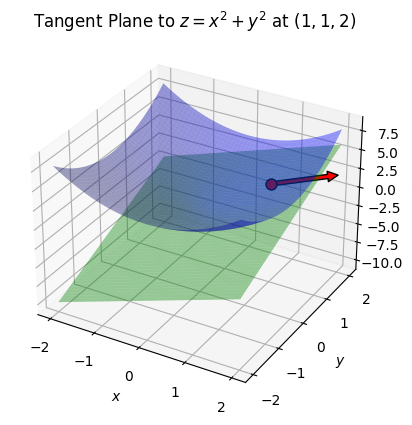

In [7]:
plot_tangent_plane(x, y, x0, y0, f, f_tangent, dfdx, plot_grad=True, grad_scale=2,
                   title=f'Tangent Plane to $z=x^2+y^2$ at ${(x0, y0, z0)}$')

If you look at the plane, the partial of $z$ with respect to $x$ turns out to represent the slope of the line running along the plane *parallel* to the x-axis at the point $(1,1)$. Similarly, the partial of $z$ with respect to $y$ represents the slope of the line running along the plane parallel to the y-axis at the point $(1,1)$. 

The gradient vector (shown in red) is both of these together, which gives a vector $(2, 2)$ that points in the steepest direction up the surface from the point $(1,1)$. Said differently, the gradient vector is the direction of *steepest ascent*.

This fact can be visualized easier by looking at the contour plot. In the contour plot, the tangent plane will appear as a line hugging tangent to the contour at the point $(1,1)$. The gradient vector will always point outward *perpendicular* to this line in the direction of steepest ascent of the function. 

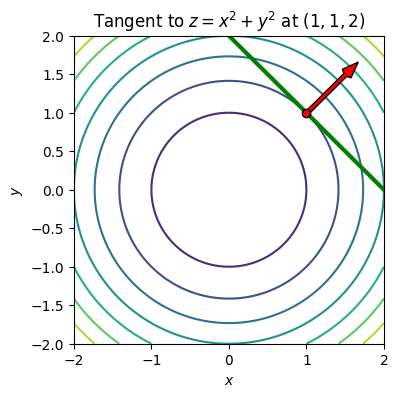

In [8]:
plot_tangent_contour(x, y, x0, y0, f, f_tangent, dfdx, title=f'Tangent to $z=x^2+y^2$ at ${(x0, y0, z0)}$')

Here's an argument for why this is true. A contour is *by definition* a curve where $z$ is constant. Imagine taking the surface of $z=f(x,y)$ and at each $z$ value slicing the surface parallel to the xy-plane. That's all a contour is. This means that along any given contour we must have $dz=0$, since $z$ can't change. But by the chain rule we already know

$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.$$ 

But since $dz=0$, this means
$$\frac{dz}{d\mathbf{x}} \cdot d\mathbf{x} = 0.$$

Now, recall two vectors $\mathbf{x}$ and $\mathbf{x}$ are orthogonal (i.e. perpendicular) if $\mathbf{x} \cdot \mathbf{y} = 0$. I've thus shown that the gradient vector $\frac{dz}{d\mathbf{x}}$ must be perpendicular to the differential vector $d\mathbf{x}$ along contours where $z$ is constant.

Since we're confined to a contour of constant $z$, any small changes $d\mathbf{x}$ as we move around the contour must be *parallel* to the contour, otherwise $dz$ wouldn't be zero. This means $\frac{dz}{d\mathbf{x}}$ must be *perpendicular* to the line tangent to the contour at $(1,1)$. That is, the gradient at $(1,1)$ is a vector pointing outward in the direction of steep ascent from the point $(1,1)$.

### The Hessian

In the univariate case, we had not just first derivatives $\frac{dy}{dx}$, but second derivatives $\frac{d^2y}{dx^2}$ too. In the multivariate case we can take second partial derivatives as well in the usual way, but there are now $2^2=4$ different ways to calculate second derivatives,

$$\frac{\partial^2 z}{\partial x^2}, \frac{\partial^2 z}{\partial x \partial y}, \frac{\partial^2 z}{\partial y \partial x}, \frac{\partial^2 z}{\partial y^2}.$$

Note the partials are by convention applied from right to left. Thankfully this doesn't matter, since for well-behaved functions the mixed partials *commute* with each other, i.e.
$$\frac{\partial^2 z}{\partial x \partial y} = \frac{\partial^2 z}{\partial y \partial x}.$$

Just as we could group first partial derivatives into a vector to get the gradient, we can group second partial derivatives into a *matrix* to get what's called the **Hessian** matrix,
$$
\frac{d^2 z}{d\mathbf{x}^2} = 
\begin{pmatrix} 
\frac{\partial^2 z}{\partial x^2} & \frac{\partial^2 z}{\partial x \partial y} \\
\frac{\partial^2 z}{\partial y \partial x} & \frac{\partial^2 z}{\partial y^2}
\end{pmatrix}.
$$

The Hessian matrix, sometimes just written $\mathbf{H}$ for brevity, is the multivariate generalization of the full second derivative, just as the gradient vector is the generalization of the full first derivative.

Just as the second derivative of a univariate function can be interpreted geometrically as representing the curvature of the *curve* $y=f(x)$, the Hessian of a multivariate function represents the curvature of the *surface* $z=f(x,y)$. This comes from considering the second order perturbation

$$z = z_0 + \frac{d}{d\mathbf{x}} f(\mathbf{x}_0) \cdot (\mathbf{x} - \mathbf{x}_0) + \frac{1}{2}(\mathbf{x} - \mathbf{x}_0)^\top \mathbf{H}(\mathbf{x}_0) (\mathbf{x} - \mathbf{x}_0).$$

The curvature of the function can be obtained by looking at the eigenvalues of the Hessian at $\mathbf{x}= \mathbf{x}_0$. Large eigenvalues represent steep curvature, while small eigenvalues represent shallow curvature. The sign of the eigenvalues indicate whether the function
1. Bowls upward: both eigenvalues are non-negative,
2. Bowls downward: both eigenvalues are non-positive,
3. Saddles: one eigenvalue is positive, one is eigenvalue negative.

Case (3) creates what's called a **saddlepoint**, a point where the function slopes upwards in one direction, but downward in the other, creating the shape of something that resembles a horse's saddle.

For the same working example $z=x^2+y^2$, we'd have

$$
\mathbf{H} = \frac{d^2 z}{d\mathbf{x}^2} = 
\begin{pmatrix} 
2 & 2 \\
2 & 2
\end{pmatrix},
$$

that is, the Hessian of this function is constant, since no elements depend on $x$ or $y$.

The eigenvalues of this Hessian are $\lambda=4,0$, both of which are non-negative. Since the Hessian is constant, this means the function bowls upward at *all* points $(x,y)$. This also means this Hessian matrix is positive semi-definite.

In [9]:
H = sp.Matrix([[2, 2], [2, 2]])
eigs = H.eigenvals(); list(eigs.keys())

[4, 0]

When a function's Hessian is positive semi-definite, i.e. it bowls upward, it's called a **convex function**. Convex functions are very important in optimization since convex functions always have a unique global minimum. Classical machine learning algorithms often take advantage of this fact.

What about higher derivatives of multivariate functions? It turns out the $k$<sup>th</sup> derivative of a multivariate function is a rank-$k$ tensor. This makes higher derivatives especially nasty, so we rarely see them.

### Differentiation in $n$ Dimensions

Similarly, we can define all of these quantities for any n-dimensional multivariate function $y=f(\mathbf{x})=f(x_0,x_1,\cdots,x_{n-1}).$ The partial derivative of $y$ with respect to some $x_i$ is the one whose only first order perturbation is $x_i+dx_i$, with the rest staying fixed,

$$\frac{\partial y}{\partial x_i} = \frac{f(x_0,x_1,\cdots,x_i+dx_i,\cdots,x_{n-1}) - f(x_0,x_1,\cdots,x_i,\cdots,x_{n-1})}{dx_i}.$$

That is, it's the derivative of $y$ with respect to $x_i$ where all other inputs $x_j \neq x_i$ are held constant. The chain rule extends by adding a term for each $dx_i$,

$$dy = \sum_{i=0}^{n-1} \frac{\partial y}{\partial x_i} dx_i = \frac{\partial y}{\partial x_0} dx_0 + \frac{\partial y}{\partial x_1} dx_1 + \cdots + \frac{\partial y}{\partial x_{n-1}} dx_{n-1},$$

Or, written as a dot product of $n$ dimensional vectors,

$$\frac{dy}{d\mathbf{x}}=\bigg(\frac{\partial y}{\partial x_0}, \frac{\partial y}{\partial x_1},\cdots,\frac{\partial y}{\partial x_{n-1}} \bigg),$$

$$d\mathbf{x} = (dx_0, dx_1,\cdots,dx_{n-1}),$$

$$dy = \frac{dy}{d\mathbf{x}} \cdot d\mathbf{x}.$$

I'll calculate a quick example with the $n$ dimensional generalization of our running quadratic function,

$$y = x_0^2 + x_1^2 + \cdots + x_{n-1}^2 = \sum_{i=0}^{n-1} x_i^2.$$

Since each partial derivative gives $\frac{\partial y}{\partial x_i} = 2x_i$, the gradient for this function should be the n-dimensional vector 

$$\frac{dy}{d\mathbf{x}} = (2x_0, 2x_1, \cdots, 2x_{n-1}) = 2\mathbf{x}.$$

Using numpy we can efficiently calculate this function with the vectorized command `np.sum(x ** 2)`. I'll choose our point of interest to be the vector $\mathbf{x}_0$ of all ones. I'll define a helper function `dfdxi` to calculate the i<sup>th</sup> partial derivative at $\mathbf{x}_0$. Note `dx` will be a vector of all zeros except at `dx[i] = dxi`. This will then be used in the function `dfdx` to calculate the gradient. It will loop over every index, calculate each partial, and put them in a vector `grad`. Observe that yet again we have a gradient vector of all twos to within an error of around `1e-5`, except instead of 1 or 2 elements we have 100 of them.

In [10]:
def dfdxi(f, x0, i, dxi=1e-5):
    dx = np.zeros(len(x0))
    dx[i] = dxi
    dydxi = (f(x0 + dx) - f(x0)) / dxi
    return dydxi

def dfdx(f, x0, dxi=1e-5):
    return np.array([dfdxi(f, x0, i, dxi=dxi) for i in range(len(x0))])

f = lambda x: np.sum(x ** 2)
x0 = np.ones(100)
grad = dfdx(f, x0)
print(grad.shape)
grad

(100,)


array([2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00

The Hessian matrix of second partial derivatives also extends to $n$ dimensional scalar-valued functions $y = f(\mathbf{x})$. The difference is that instead of just $2^2=4$ second partials, we now have $n^2$ possible second partials. These can be organized into an $n \times n$ matrix

$$
\mathbf{H} = \frac{d^2 y}{d\mathbf{x}^2} = 
\begin{pmatrix} 
\frac{\partial^2 y}{\partial x_0^2} & \frac{\partial^2 y}{\partial x_0 \partial x_1} & \cdots & \frac{\partial^2 y}{\partial x_0 \partial x_{n-1}} \\ 
\frac{\partial^2 y}{\partial x_1 \partial x_0} & \frac{\partial^2 y}{\partial x_1^2} & \cdots & \frac{\partial^2 y}{\partial x_1 \partial x_{n-1}} \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 y}{\partial x_{n-1} \partial x_0} & \frac{\partial^2 y}{\partial x_{n-1} \partial x_1} & \cdots & \frac{\partial^2 y}{\partial x_{n-1}^2}
\end{pmatrix}.
$$

Since the mixed partials again typically all commute, $\mathbf{H}$ is a symmetric matrix. The eigenvalues of $\mathbf{H}$ again determine the curvature of the function at any point$\mathbf{x}=\mathbf{x}_0$. If all the eigenvalues are non-negative, the Hessian will be positive semi-definite, the function will bowl upwards, and $f(\mathbf{x})$ will be a convex function. Otherwise, the function may bowl downward, or have saddlepoints.

### The Jacobian

Thus far we've seen the following two types of functions:
- scalar-valued functions of a scalar variable: $y=f(x)$,
- scalar-valued functions of a vector variable: $y = f(\mathbf{x})$. 

As you might expect, we can also have the equivalent vector-valued functions:
- vector-valued functions of a scalar variable: $\mathbf{y} = f(x)$,
- vector-valued functions of a vector variable: $\mathbf{y} = f(\mathbf{x})$.

The most relevant of these two for machine learning purposes is the vector-valued function of a vector variable $\mathbf{y} = f(\mathbf{x})$. These functions are just extensions of the scalar-valued vector variable functions $y = f(\mathbf{x})$ we've been working with so far, except now we can have $m$ scalar-valued functions $y_i = f_i(\mathbf{x})$, which when put together make up a *vector* output 

$$\mathbf{y} = (y_0,y_1,\cdots,y_{m-1}) = (f_0(\mathbf{x}),f_1(\mathbf{x}),\cdots,f_{m-1}(\mathbf{x})).$$

To define the gradient of a vector-valued function, we just take the gradient of each output element $y_i=f_i(\mathbf{x})$. Doing this over all $m$ output elements will give $m$ gradients each of size $n$,

$$\frac{dy_0}{d\mathbf{x}}, \frac{dy_1}{d\mathbf{x}}, \cdots, \frac{dy_{m-1}}{d\mathbf{x}}.$$

By treating all these gradients as row vectors, we can assemble them into a single $m \times n$ matrix to get *the* derivative of the vector-valued function $\mathbf{y} = f(\mathbf{x})$. This matrix is usually called the **Jacobian** matrix, sometimes denoted in short-hand by the symbol $\mathbf{J}$. It's defined as the $m \times n$ of all possible first partial derivatives,

$$
\mathbf{J} = \frac{d\mathbf{y}}{d\mathbf{x}} = 
\begin{pmatrix} 
\frac{\partial y_0}{\partial x_0} & \frac{\partial y_0}{\partial x_1} & \cdots & \frac{\partial y_0}{\partial x_{n-1}} \\ 
\frac{\partial y_1}{\partial x_0} & \frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_{n-1}} \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial y_{m-1}}{\partial x_0} & \frac{\partial y_{m-1}}{\partial x_1} & \cdots & \frac{\partial y_{m-1}}{\partial x_{n-1}}
\end{pmatrix}.
$$

To see an example of a vector-valued function, consider the function $\mathbf{y} = f(\mathbf{x})$ given by

$$
\mathbf{y} = 
\begin{pmatrix} 
y_0 \\ 
y_1
\end{pmatrix} = 
\begin{pmatrix} 
x_0^3 + x_1^2 \\ 
2 x_0 - x_1^4 \\ 
\end{pmatrix}.
$$

This is really two functions $y_0 = x_0^3 + x_1^2$ and $y_1 = 2 x_0 - x_1^4$. Here's what its Jacobian would look like,

$$
\mathbf{J} = 
\begin{pmatrix} 
\frac{\partial y_0}{\partial x_0} & \frac{\partial y_0}{\partial x_1} \\ 
\frac{\partial y_1}{\partial x_0} & \frac{\partial y_1}{\partial x_1}
\end{pmatrix} = 
\begin{pmatrix} 
3 x_0^2 & 2 x_1  \\ 
2 & -4 x_1^3
\end{pmatrix}.
$$

Notice each row of the Jacobian is the gradient of the elements of $\mathbf{y}$, as you'd expect,

$$\frac{dy_0}{d\mathbf{x}} = (3x_0^2, 2x_1), \qquad \frac{dy_1}{d\mathbf{x}} = (2, -4x_1^3).$$

### Application: The Softmax Function

A more interesting example of vector-valued functions and Jacobians that's very relevant to machine learning is the **softmax** function, defined by

$$
\mathbf{y} = \text{softmax}(\mathbf{x}) = 
\begin{pmatrix} 
y_0 \\ 
y_1 \\
\dots \\
y_{n-1}
\end{pmatrix} =
\begin{pmatrix} 
\frac{1}{Z} e^{x_0} \\
\frac{1}{Z} e^{x_1} \\
\dots \\
\frac{1}{Z} e^{x_{n-1}}
\end{pmatrix},
$$

where $Z = \sum_k e^{x_k}$ is a normalizing constant, often called the **partition function**. This function shows up in machine learning as a way to create probabilities out of $n$ categories. It takes inputs $x_i$ of any real value and scales them so that $0 \leq y_i \leq 1$ and $\sum_i y_i = 1$, so that the output is a valid probability vector. 

The softmax is useful in defining models for multi-class classification problems, since it can be used to classify things into one of $n$ classes. To classify an object as type $k$, choose the index $k$ such that $y_k$ is the largest probability in the probability vector $\mathbf{y}$. More on this in future lessons.

Here's an example illustrating what the softmax function does. I'll define a vector $x$ of size $n=5$ by randomly sampling from the interval $[-1,1]$. I'll use a quick lambda function to implement the softmax. Observe what the softmax seems to do is take the elements of $x$ and re-scale them so they're all in the interval $[0,1]$. The outputs also indeed sum to one by construction.

In [11]:
x = np.random.randn(5)
print(f'x = {x.round(3)}')

softmax = lambda x: np.exp(-x) / np.sum(np.exp(-x))
y = softmax(x)
print(f'y = {y.round(3)}')
print(f'sum(y) = {y.sum()}')

x = [ 0.233  0.353  1.765 -1.628  1.005]
y = [0.111 0.099 0.024 0.715 0.051]
sum(y) = 0.9999999999999999


Note you would *not* want to implement the softmax this way at scale due to numerical instability. We'll get back to this stuff in much more depth in a later lesson.

Since we'll need it later on anyway, let's go ahead and calculate the Jacobian of the softmax function. Let's work term by term, focusing on the $j$th partial derivative of $y_i=\frac{1}{Z} e^{x_i}$. First, notice that the derivative of the partition function is

$$\frac{\partial Z}{\partial x_j} = \frac{\partial}{\partial x_j} \sum_k e^{x_k} = \sum_k \frac{\partial}{\partial x_j} e^{x_k} = e^{x_j}$$

since the only term in the sum containing $x_j$ is $e^{x_j}$. Using this along with the quotient rule, we thus have

$$
J_{i,j} = \frac{\partial y_i}{\partial x_j} = \frac{\partial}{\partial x_j} \frac{e^{x_i}}{Z} = 
\frac{1}{Z^2}\bigg(Z \frac{\partial e^{x_i}}{\partial x_j} - e^{x_i} \frac{\partial Z}{\partial x_j} \bigg) = 
\begin{cases}
\frac{e^{x_i}}{Z} \big(1 - \frac{e^{x_i}}{Z}\big), & i = j \\
-\frac{e^{x_i}}{Z} \frac{e^{x_j}}{Z}, & i \neq j
\end{cases} \ = \
\begin{cases}
y_i (1 - y_i), & i = k \\
-y_i y_j & i, \neq k.
\end{cases}
$$

Putting all this into the Jacobian matrix, the $i=j$ terms go in the diagonal, and the $i \neq j$ terms go in the off-diagonals, hence

$$
\mathbf{J} = 
\begin{pmatrix} 
y_0 (1 - y_0) & -y_0 y_1 & \cdots & -y_0 y_{n-1} \\ 
-y_1 y_0 & y_1 (1 - y_1) & \cdots & -y_1 y_{n-1} \\ 
\vdots & \vdots & \ddots & \vdots \\
-y_{n-1} y_0 & -y_{n-1} y_1 & \cdots & y_{n-1} (1 - y_{n-1})
\end{pmatrix}
$$

If you play with this expression a little bit, you'll see we can write this softmax Jacobian efficiently as $\mathbf{J} = \text{diag}(\mathbf{y}) - \mathbf{y} \mathbf{y}^\top$.

Here's the Jacobian for the above example where $n=5$, which I'll call `grad`. It's common in machine learning to blur the distinction between Jacobians and gradients and just call everything a gradient. Notice `grad` is a $5 \times 5$ matrix.

In [12]:
grad = np.diag(y) - y @ y.T
grad

array([[-0.42519518, -0.53635208, -0.53635208, -0.53635208, -0.53635208],
       [-0.53635208, -0.43777795, -0.53635208, -0.53635208, -0.53635208],
       [-0.53635208, -0.53635208, -0.51232024, -0.53635208, -0.53635208],
       [-0.53635208, -0.53635208, -0.53635208,  0.17853611, -0.53635208],
       [-0.53635208, -0.53635208, -0.53635208, -0.53635208, -0.48500314]])

**Aside:** We've talked about functions with scalar and vector inputs or outputs. What about functions with matrix or tensor inputs or outputs? We could just as well define scalar-valued functions of a matrix variable $y = f(\mathbf{X})$, matrix-valued function of a matrix variable $\mathbf{Y} = f(\mathbf{X})$, etc. The derivative rules extend into these cases as well, but things get a lot more complicated. Taking any kind of derivative of these kinds of functions can cause the rank of the derivative to blow up. For example, the derivative of a (rank-2) matrix with respect to another (rank-2) matrix is now a rank-4 tensor. For at least partly this reason, derivatives of such functions are less commonly used. See [this](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) comprehensive paper if you're interested in how to take derivatives of matrices.

### Gradient and Jacobian Rules

Here are a few common gradient and Jacobian rules. Don't worry too much about how to derive these. Don't even try to memorize them. Just scan over them and remember to reference this table in future lessons.

<table width="100%">
  <tr>
    <th style="width: 20ch; text-align: left">Name</th>
    <th style="width: 50ch; text-align: left">Gradient</th>
    <th style="width: 30ch; text-align: left">Scalar Derivative Equivalent</th>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Rule (scalar-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} (cy) = c\frac{dy}{d\mathbf{x}}$</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx} (cy) = c\frac{dy}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Rule (vector-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} (c\mathbf{y}) = c\frac{d\mathbf{y}}{d\mathbf{x}}$</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx} (cy) = c\frac{dy}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Addition Rule (scalar-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}}(u + v) = \frac{du}{d\mathbf{x}} + \frac{dv}{d\mathbf{x}}$</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx}(u + v) = \frac{du}{dx} + \frac{dv}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Addition Rule (vector-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}}(\mathbf{u} + \mathbf{v}) = \frac{d\mathbf{u}}{d\mathbf{x}} + \frac{d\mathbf{v}}{d\mathbf{x}}$</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx}(u + v) = \frac{du}{dx} + \frac{dv}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Product Rule (scalar-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}}(uv) = u\frac{dv}{d\mathbf{x}} + v\frac{du}{d\mathbf{x}}$</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx}(uv) = u\frac{dv}{dx} + v\frac{du}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Product Rule (dot products)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}}(\mathbf{u}^\top \mathbf{v}) = \mathbf{u}^\top \frac{d\mathbf{v}}{d\mathbf{x}} + \mathbf{v}^\top \frac{d\mathbf{u}}{d\mathbf{x}}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(uv) = u\frac{dv}{dx} + v\frac{du}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Chain Rule (both scalar-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{dz}{d\mathbf{x}} = \frac{dz}{dy} \frac{dy}{d\mathbf{x}}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Chain Rule (scalar-valued, vector-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{dz}{d\mathbf{x}} = \big(\frac{dz}{d\mathbf{y}}\big)^\top \frac{d\mathbf{y}}{d\mathbf{x}}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Chain Rule (both vector-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d\mathbf{z}}{d\mathbf{x}} = \frac{d\mathbf{z}}{d\mathbf{y}} \frac{d\mathbf{y}}{d\mathbf{x}}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Function (scalar-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} c = 0$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} c = 0$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Function (vector-valued)</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} \mathbf{c} = \mathbf{0}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} c = 0$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Squared Two-Norm</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} ||\mathbf{x}||_2^2 = \frac{d}{d\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2 \mathbf{x}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} x^2 = 2x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Linear Combination</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} \mathbf{c}^\top \mathbf{x} = \mathbf{c}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} cx = c$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Symmetric Quadratic Form</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} \mathbf{x}^\top \mathbf{S} \mathbf{x} = 2 \mathbf{S} \mathbf{x}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} sx^2 = 2sx$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Affine Function</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} (\mathbf{A}\mathbf{x} + \mathbf{b})  = \mathbf{A}^\top$ or $\frac{d}{d\mathbf{x}} (\mathbf{x}^\top \mathbf{A} + \mathbf{b})  = \mathbf{A}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} (ax+b) = a$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Squared Error Function</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} ||\mathbf{A}\mathbf{x}-\mathbf{b}||_2^2 = 2\mathbf{A}^\top (\mathbf{A}\mathbf{x}-\mathbf{b})$</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx} (ax-b)^2 = 2a(ax-b)$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Cross Entropy Function</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} (-\mathbf{c}^\top \log \mathbf{x}) = -\frac{\mathbf{c}}{\mathbf{x}}$ (element-wise division)</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx} (-c \log x) = -\frac{c}{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">ReLU Function</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} \max(\mathbf{0}, \mathbf{x}) = \text{diag}(\mathbf{x} \geq \mathbf{0})$ (element-wise $\geq$)</td>
    <td style="width: 30ch; text-align: left;">$\frac{d}{dx} \max(0, x) = \text{$1$ if $x \geq 0$ else $0$}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Softmax Function</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{d\mathbf{x}} \text{softmax}(\mathbf{x}) = \text{diag}(\mathbf{y}) - \mathbf{y} \mathbf{y}^\top$ where $\mathbf{y} = \text{softmax}(\mathbf{x})$</td>
    <td style="width: 30ch; text-align: left;"></td>
  </tr>
</table>

You *can* calculate gradients and Jacobians in sympy, though in my opinion it can be kind of painful except in the simplest cases. Here's an example, where I'll calculate the Jacobian of the squared error function $||\mathbf{A}\mathbf{x}-\mathbf{b}||_2^2$.

**Aside:** There is also a nice online [tool](https://www.matrixcalculus.org/) that lets you do this somewhat more easily.

In [13]:
m = sp.Symbol('m')
n = sp.Symbol('n')
A = sp.MatrixSymbol('A', m, n)
x = sp.MatrixSymbol('x', n, 1)
b = sp.MatrixSymbol('b', m, 1)

y = (A * x - b).T * (A * x - b)
y.diff(x)

2*A.T*(A*x - b)

## Multivariate Integration

### Integration in 2 Dimensions

We can also integrate multivariate functions like $z=f(x,y)$. Geometrically these integrals translate into calculating the *volume* under the surface of $z=f(x,y)$. I'll very briefly touch on this.

The idea here is to approximate the volume $V$ under a surface not with $N$ *rectangles* of width $dx$ and height $f(x)$, but instead with $N \cdot M$ *rectangular prisms* of base area $dA = dx \cdot dy$ and height $z=f(x,y)$,

$$V = \int_R f(x,y) dA = \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} f(x_n,y_m) dxdy = f(x_0,y_0) dxdy + f(x_0,y_1) dxdy + \cdots + f(x_1,y_0) dxdy + \cdots + f(x_{N-1},y_{M-1}) dxdy.$$

Rather than integrate from one endpoint $a$ to another endpoint $b$, we now have to integrate over a 2D region in the xy-plane that I'll call $R$. 

If $R$ is just a rectangle in the xy-plane, say $R = [a,b] \times [c,d]$ we can break the integral $\int_R dA$ into two integrals $\int_a^b dx$ and $\int_c^d dy$. If we can *also* factor $f(x,y) = g(x)h(y)$, we can further break the integral into a product of two univariate integrals,

$$\int_R f(x,y) dA = \int_a^b \int_c^d f(x,y) dxdy = \bigg(\int_a^b g(x) dx \bigg) \bigg( \int_c^d h(y) dy \bigg).$$

As an example, suppose we wanted to integrate the function $f(x,y) = x^2 \sqrt{y}$ over the rectangle $R = [0,1] \times [0,1]$. This function factors into a product of two functions $g(x) = x^2$ and $h(y) = \sqrt{y}$. We can thus integrate each individually to get

$$\int_0^1 \int_0^1 x^2 \sqrt{y} dxdy = \bigg(\int_0^1 x^2 dx\bigg) \bigg(\int_0^1 \sqrt{y} dy\bigg) = \frac{1}{3} x^3 \bigg |_{x=0}^1 \cdot \frac{2}{3} y^{3/2} \bigg |_{y=0}^1 = \frac{1}{3} \cdot \frac{2}{3} = \frac{2}{9}.$$

In general $R$ won't be a rectangle, but some arbitrary shape. And $f(x,y)$ won't usually factor. When this is the case we usually have to fall back to numerical integration methods.



### Application: Integrating the Gaussian

One of the most important functions in machine learning, if not all of science, is the Gaussian function

$$y = e^{-\frac{1}{2} x^2}.$$

The Gaussian is the function that gives the well-known bell-curve shape.

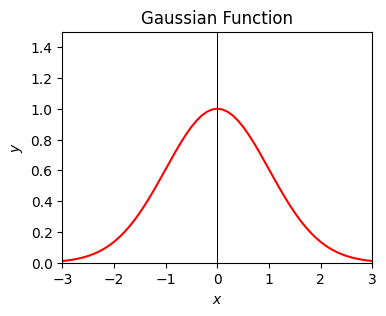

In [14]:
x = np.arange(-10, 10, 0.1)
f = lambda x:  np.exp(-1 / 2 * x ** 2)
plot_function(x, f, xlim=(-3, 3), ylim=(-0, 1.5), show_grid=False, title='Gaussian Function')

It's very important in many applications of probability and statistics to be able to integrate the Gaussian function between two points $a$ and $b$,

$$\int_a^b e^{-\frac{1}{2} x^2} dx.$$

Unfortunately, this turns out to be *impossible* to do analytically, because the Gaussian function has no indefinite integral. No matter how hard you try, you'll never find an elementary function $F(x)$ whose derivative is $f(x)=e^{-\frac{1}{2} x^2}$. 

One special case, however, where we *can* integrate the Gaussian analytically is when the region is the whole real line,

$$\int_{-\infty}^\infty e^{-\frac{1}{2} x^2} dx.$$

It's surprising we can even do this. We can do it using a trick. The trick is to *square* the Gaussian. Consider instead the function

$$f(x,y) = e^{-\frac{1}{2} x^2} e^{-\frac{1}{2} y^2} = e^{-\frac{1}{2} (x^2+y^2)}.$$

Consider now the bivariate integral

$$\int_{\mathbb{R}^2} f(x,y) dxdy = \int_{-\infty}^\infty \int_{-\infty}^\infty e^{-\frac{1}{2} (x^2+y^2)} dxdy.$$

This integral doesn't on the face of it look any easier, but we can do something with it that we can't with the univariate integral: change variables. I won't go into detail here, but if we define 2 new variables $r$ and $\theta$ (which turn out to be polar coordinates)

$$r^2 = x^2+y^2, \quad \tan \theta = -\frac{y}{x},$$

then $dxdy = rdrd\theta$, and we can re-write the bivariate integral as 

$$\int_{\mathbb{R}^2} f(x,y) dxdy = \int_0^\infty \int_0^{2\pi} e^{-\frac{1}{2}r^2} rdrd\theta = \bigg(\int_0^{2\pi} d\theta \bigg) \bigg( \int_0^\infty re^{-\frac{1}{2}r^2} dr \bigg).$$

This is just a product of two univariate integrals that we can evaluate. The first integral is easy,

$$\int_0^{2\pi} d\theta = \theta \bigg |_{\theta=0}^{2\pi} = 2\pi.$$

The second integral is a little harder, but we can solve it by using another change of variables $u=r^2$, so $du = 2rdr$, to get

$$\int_0^\infty re^{-\frac{1}{2}r^2} dr = \int_0^\infty e^{-\frac{1}{2}u} \bigg(\frac{1}{2} du\bigg) = \frac{1}{2} \int_0^\infty e^{-\frac{1}{2}u} du = -e^{-\frac{1}{2}u} \bigg |_{u=0}^\infty = -(e^{-\infty} - 1) = 1,$$

since $e^{-\infty} = \frac{1}{e^{\infty}} = \frac{1}{\infty} = 0$. Putting these together, the bivariate integral is thus

$$\int_{-\infty}^\infty \int_{-\infty}^\infty e^{-\frac{1}{2} (x^2+y^2)} dxdy = 2\pi.$$

Since $e^{-\frac{1}{2} (x^2+y^2)} = e^{-\frac{1}{2} x^2} e^{-\frac{1}{2} y^2}$, we can factor this integral into a product to get

$$2\pi = \int_{-\infty}^\infty \int_{-\infty}^\infty e^{-\frac{1}{2} x^2} dxdy = \bigg(\int_{-\infty}^\infty e^{-\frac{1}{2} x^2} dx \bigg) \bigg(\int_{-\infty}^\infty e^{-\frac{1}{2} y^2} dy\bigg).$$

Both of the integrals on the right are the same, so they must equal the same number, call it $A$. We thus have an equation $A^2 = 2\pi$, which we can solve to get the area under each integral, which is $A=\sqrt{2\pi}$. Thus, we've arrived at the final result for the univariate integral of the Gaussian,

$$\int_{-\infty}^\infty e^{-\frac{1}{2} x^2} dx = \sqrt{2\pi} \approx 2.507.$$

Any time from now on you see the factors of $\sqrt{2\pi}$ in a Gaussian function, this is where they come from.

It's interesting that we can integrate a function all the way from $-\infty$ to $\infty$ and still get a finite number. This is because Gaussian functions rapidly decay, so most of their area ends up being around $x=0$. In fact, the interval $[-3,3]$ alone contains 99.7% of the area of the under the bell curve!

Here's the same integral verified using sympy. Note the unusual notation sympy uses for $\infty$, which is `sp.oo`.

In [15]:
x = sp.Symbol('x') 
y = sp.exp(-sp.Rational(1, 2) * x ** 2)
y.integrate((x, -sp.oo, sp.oo))

sqrt(2)*sqrt(pi)

### Integration in $n$ Dimensions

The same idea extends to $n$ dimensional functions $y=f(x_0,\cdots,x_{n-1})$. In this case we're calculating the $n+1$ dimensional *hypervolume* $V_{n+1}$ under the $n$ dimensional *manifold* $y=f(x_0,\cdots,x_{n-1})$. The hyperrectangles would now have base hyperarea $dA_n = dx_0dx_1\cdots dx_{n-1}$ and height $y$, so

$$V_{n+1} = \int_{R_n} f(x_0,\cdots,x_{n-1}) dA_n = \sum_{\text{all hyperrectangles}} f(x_0,\cdots,x_{n-1}) dx_0dx_1\cdots dx_{n-1}.$$

If we're sufficiently lucky, we can factor a multivariate integral into a product of univariate integrals. We can do this as long as 
- the multivariate function $f(x_0,\cdots,x_{n-1})$ factors into a product of univariate functions $$f(x_0,x_1,\cdots,x_{n-1}) = f_0(x_0) f_1(x_1) \cdots f_{n-1}(x_{n-1}),$$
- the integration region $R_n$ is a product of rectangles, $$R_n = [a_0,b_0] \times [a_1,b_1] \times \cdots \times [a_{n-1},b_{n-1}].$$

When this is the case, we can simplify the integral to

$$\int_{R_n} f(x_0,x_1,\cdots,x_{n-1}) dA_n = \bigg(\int_{a_0}^{b_0} f_0(x_0) dx_0\bigg) \bigg(\int_{a_1}^{b_1} f_1(x_1) dx_1\bigg) \cdots \bigg(\int_{a_{n-1}}^{b_{n-1}} f_{n-1}(x_{n-1}) dx_{n-1}\bigg).$$

We can then evaluate each univariate integral one-by-one and put the results together to get the full multivariate integral.

If you don't understand what's going on here, that's fine. When you see multivariate integrals come up in future lessons, just think of them as a way to calculate the volumes under surfaces. That's the most important thing to take away.